<a href="https://www.kaggle.com/code/georgekoumellis/bitcoin-usd?scriptVersionId=107981626" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
pd.set_option('expand_frame_repr', False)  



In [2]:
# get current price data
def get_current_data(from_sym='BTC', to_sym='USD', exchange=''):
    '''
    fetches todays value of bitcoin from an api and converts imports it as a json file
    '''
    url = 'https://min-api.cryptocompare.com/data/price'    
    
    parameters = {'fsym': from_sym,
                  'tsyms': to_sym }
    
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange
        
    # response comes as json
    response = requests.get(url, params=parameters)   
    data = response.json()
    
    return data 

In [3]:
# get the historic bitcoin data 
def get_hist_data(from_sym='BTC', to_sym='USD', timeframe = 'day', limit=2000, aggregation=1, exchange=''):
    '''
    fetches historic values of bitcoin from an api and converts imports it as a json file
    '''
    url = 'https://min-api.cryptocompare.com/data/v2/histo'
    url += timeframe
    
    parameters = {'fsym': from_sym,
                  'tsym': to_sym,
                  'limit': limit,
                  'aggregate': aggregation}
    if exchange:
        print('exchange: ', exchange)
        parameters['e'] = exchange    
    
    print('baseurl: ', url) 
    print('timeframe: ', timeframe)
    print('parameters: ', parameters)
    
    # response comes as json
    response = requests.get(url, params=parameters)   
    
    data = response.json()['Data']['Data'] 
    
    return data 

In [4]:
# function to convert data into a table which is easier to manipulate
def data_to_dataframe(data):
    '''
    converts a json file to a pandas dataframe which is easier to manipulate
    '''
    #data from json is in array of dictionaries
    df = pd.DataFrame.from_dict(data)
    
    # time is stored as an epoch, we need normal dates
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    print(df.tail())
    
    return df

In [5]:
# visualise the data
def plot_data(df, cryptocurrency, target_currency):
    '''
    plots the data of the historic bitcoin price
    '''
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    
    plt.figure(figsize=(15,5))
    plt.title('{} / {} price data'.format(cryptocurrency, target_currency))
    plt.plot(df.index, df.close)
    plt.legend()
    plt.show()
    
    return None

baseurl:  https://min-api.cryptocompare.com/data/v2/histoday
timeframe:  day
parameters:  {'fsym': 'BTC', 'tsym': 'USD', 'limit': 1000, 'aggregate': 1}
                high       low      open  volumefrom      volumeto     close conversionType conversionSymbol
time                                                                                                        
2022-10-09  19558.67  19325.60  19419.32    19856.73  3.862660e+08  19442.41         direct                 
2022-10-10  19526.12  19052.64  19442.41    44380.54  8.563320e+08  19131.36         direct                 
2022-10-11  19263.78  18858.74  19131.36    61563.85  1.173375e+09  19058.29         direct                 
2022-10-12  19231.72  18977.33  19058.29    38948.93  7.442622e+08  19154.85         direct                 
2022-10-13  19173.12  18229.27  19154.85    43532.37  8.120971e+08  18441.43         direct                 


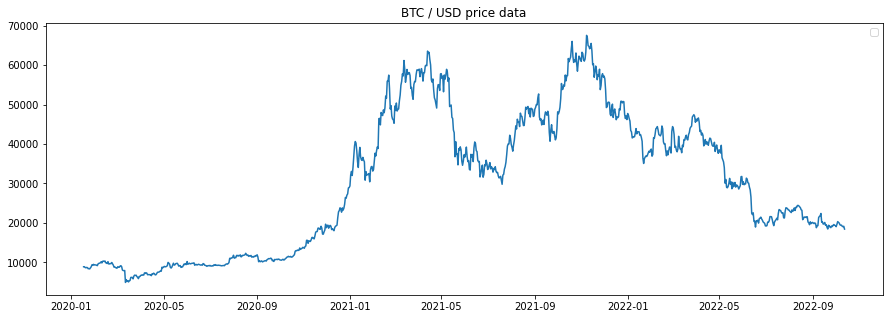

baseurl:  https://min-api.cryptocompare.com/data/v2/histominute
timeframe:  minute
parameters:  {'fsym': 'BTC', 'tsym': 'USD', 'limit': 1440, 'aggregate': 1}
                         high       low      open  volumefrom    volumeto     close conversionType conversionSymbol
time                                                                                                               
2022-10-13 14:02:00  18411.96  18400.77  18411.49       55.75  1026030.21  18403.67         direct                 
2022-10-13 14:03:00  18414.97  18401.97  18403.67       85.14  1567615.40  18411.81         direct                 
2022-10-13 14:04:00  18431.48  18411.81  18411.81       94.74  1745602.95  18430.30         direct                 
2022-10-13 14:05:00  18442.45  18427.33  18430.30      121.47  2239339.44  18440.08         direct                 
2022-10-13 14:06:00  18441.20  18440.08  18440.08        0.00        0.00  18441.20         direct                 


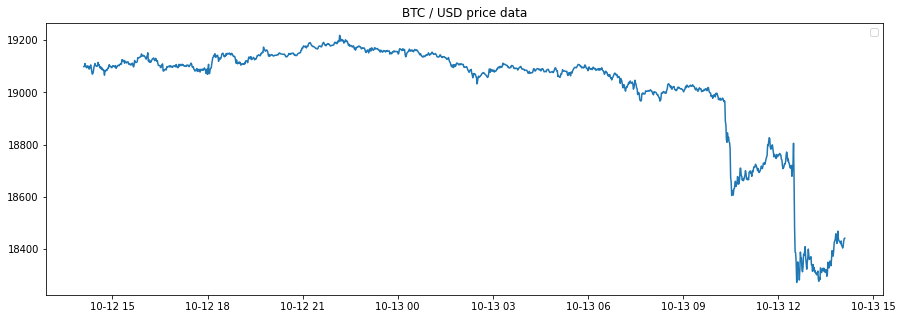

In [6]:
cryptocurrency = 'BTC'
target_currency = 'USD'

# print a graph with daily values
data = get_hist_data(cryptocurrency, target_currency, 'day', 1000)
df = data_to_dataframe(data)

plot_data(df, cryptocurrency, target_currency)

# print a graph with minutely values from the past 24 hours
minute_data = get_hist_data(cryptocurrency, target_currency, 'minute', 1440)
minute_df = data_to_dataframe(minute_data)
plot_data(minute_df, cryptocurrency, target_currency)

In [7]:
# get current price data
current_price = float(df.iloc[-1:]['close'])
current_price



18441.43

In [8]:
minute_price = minute_df.iloc[-1:]
float_minute_price = float(minute_price['close'])
float_minute_price

18441.2

In [9]:
recent_df = df['close'].iloc[-10::]
inverse_df = recent_df.iloc[::-1]
inverse_df



time
2022-10-13    18441.43
2022-10-12    19154.85
2022-10-11    19058.29
2022-10-10    19131.36
2022-10-09    19442.41
2022-10-08    19419.32
2022-10-07    19532.81
2022-10-06    19965.12
2022-10-05    20160.74
2022-10-04    20344.58
Name: close, dtype: float64

In [10]:
trend_df = df.iloc[-70::]['close']
weekly_average = trend_df.groupby(np.arange(len(trend_df))//7).mean()
current_week = weekly_average[9]
inv_week = weekly_average.iloc[::-1]
inv_week

9    19168.638571
8    19700.075714
7    19191.992857
6    19376.475714
5    21052.775714
4    19570.031429
3    20018.082857
2    21335.011429
1    23953.658571
0    23476.127143
Name: close, dtype: float64

In [11]:
x = weekly_average[9]
counter = 0
negative_counter = 0
for i in inv_week:
    if x >= i:
        counter += 1
        x = i
        pass
    else:
        break
for i in inv_week:
    if x <= i:
        negative_counter += 1
        x = i
        pass
    else:
        break

print(negative_counter)

2


In [12]:
previous_values = recent_df.iloc[:-1]
low_value = previous_values.min()
high_value = previous_values.max()
average = inverse_df.mean()

if current_price - 100 > average:
    print('Short term: sell bitcoin at the current price of: ${}'.format(str(float_minute_price)))
    print("Reasoning: Bitcoin's current price is ${} higher than the average of the past 10 days".format(round(abs(current_price-average))))
elif current_price + 100 < average:
    print('Short term: Buy bitcoin at the current price of: ${}'.format(str(float_minute_price)))
    print("Reasoning: Bitcoin's current price is ${} lower than the average of the past 10 days".format(round(abs(current_price-average))))

if counter != 1:
    print("Trend: Bitcoin has been increasing in value for the past {} weeks".format(counter))
    print("Long term: Buy")

if negative_counter != 1:
    print("Trend: Bitcoin has been decreasing in value for the past {} weeks".format(negative_counter))
    print("Long term: Sell")
    
# elif current_price < inverse_df[1] < inverse_df[2]:
#    print('buy bitcoin at the current price of: ${}'.format(str(float_minute_price)))
# elif current_price > inverse_df[1] > inverse_df[2]:
#    print('sell bitcoin at the current price of: ${}'.format(str(float_minute_price)))


Short term: Buy bitcoin at the current price of: $18441.2
Reasoning: Bitcoin's current price is $1024 lower than the average of the past 10 days
Trend: Bitcoin has been decreasing in value for the past 2 weeks
Long term: Sell
